In [1]:
import geopandas as gpd

# Đọc dữ liệu từ bộ dữ liệu ví dụ của GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Tạo cột Hemisphere
gdf['Hemisphere'] = gdf['geometry'].apply(lambda x: 'Norte' if x.y > 0 else 'Sur')

# Tạo cột Color
gdf['Color'] = gdf['Hemisphere'].apply(lambda x: '#D94325' if x == 'Norte' else '#5CD925')

# Sử dụng hàm explore để trực quan hóa
gdf.explore(column='Hemisphere', color=gdf['Color'])


ModuleNotFoundError: No module named 'geopandas'

In [17]:
# 3rd party modules
import pandas as pd
import geopandas as gpd
import shapely
# needs 'descartes'

import matplotlib.pyplot as plt

df = pd.DataFrame({'city': ['Berlin', 'Paris', 'Munich'],
                   'latitude': [52.518611111111, 48.856666666667, 48.137222222222],
                   'longitude': [13.408333333333, 2.3516666666667, 11.575555555556]})
gdf = gpd.GeoDataFrame(df.drop(['latitude', 'longitude'], axis=1),
                       crs={'init': 'epsg:4326'},
                       geometry=[shapely.geometry.Point(xy)
                                 for xy in zip(df.longitude, df.latitude)])
print(gdf)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.show()

c:\Users\ASUS\anaconda3\envs\yolov8\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18616\96140673.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


     city                   geometry
0  Berlin  POINT (13.40833 52.51861)
1   Paris   POINT (2.35167 48.85667)
2  Munich  POINT (11.57556 48.13722)


DriverError: c:\Users\ASUS\anaconda3\envs\yolov8\lib\site-packages\geopandas\datasets\naturalearth_lowres\naturalearth_lowres.shp: No such file or directory

In [18]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Tải bộ dữ liệu thế giới từ nguồn trực tiếp
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Tạo dữ liệu AIS mẫu
data = {
    'MMSI': [219001232, 219001232],
    'Latitude': [54.371177, 54.371637],
    'Longitude': [11.992425, 11.992168],
    'ShipType': ['Passenger', 'Passenger'],
    'Name': ['PRINS JOACHIM', 'PRINS JOACHIM'],
    'Speed': [15.0, 15.1],
    'Destination': ['GEDSER ROSTOCK FERRY', 'GEDSER ROSTOCK FERRY']
}

df = pd.DataFrame(data)

# Tạo GeoDataFrame từ DataFrame
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=[Point(xy) for xy in zip(df.Longitude, df.Latitude)])

# Hiển thị bản đồ thế giới và thêm thông tin AIS của tàu
base = world.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18616\1699431314.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


DriverError: c:\Users\ASUS\anaconda3\envs\yolov8\lib\site-packages\geopandas\datasets\naturalearth_lowres\naturalearth_lowres.shp: No such file or directory

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18616\3420894568.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


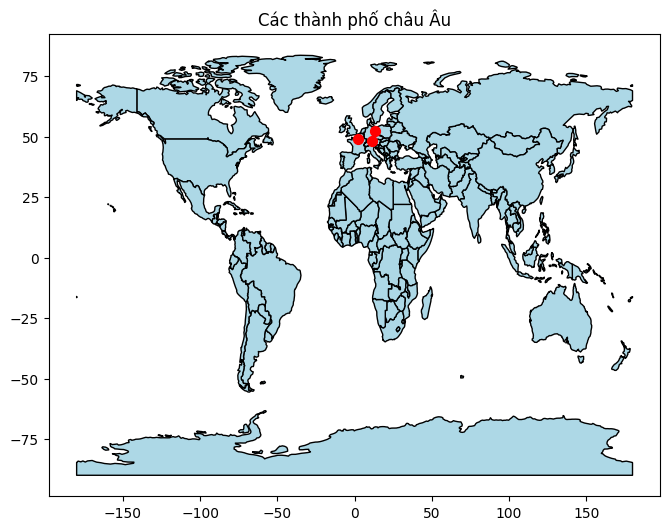

In [13]:
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt

# Tạo DataFrame từ các thông tin về thành phố
df = pd.DataFrame({
    'city': ['Berlin', 'Paris', 'Munich'],
    'latitude': [52.518611111111, 48.856666666667, 48.137222222222],
    'longitude': [13.408333333333, 2.3516666666667, 11.575555555556]
})

# Tạo GeoDataFrame từ DataFrame
gdf = gpd.GeoDataFrame(df.drop(['latitude', 'longitude'], axis=1),
                       crs='epsg:4326',
                       geometry=[shapely.geometry.Point(xy)
                                 for xy in zip(df.longitude, df.latitude)])

# Đọc dữ liệu bản đồ thế giới
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Vẽ bản đồ thế giới với màu nền lightblue và viền đen
fig, ax = plt.subplots(figsize=(10, 6))  # Kích thước bản đồ 10x6 inches
base = world.plot(ax=ax, color='lightblue', edgecolor='black')

# Vẽ điểm trên bản đồ thế giới với màu đỏ và kích thước 50
gdf.plot(ax=base, marker='o', color='red', markersize=50)

# Đặt tiêu đề cho biểu đồ
plt.title('Các thành phố châu Âu')

# Hiển thị biểu đồ
plt.show()


In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Đọc dữ liệu từ bộ dữ liệu ví dụ của GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Tạo cột Hemisphere
gdf['Hemisphere'] = gdf['geometry'].apply(lambda x: 'Norte' if x.y > 0 else 'Sur')

# Tạo cột Color
gdf['Color'] = gdf['Hemisphere'].apply(lambda x: '#D94325' if x == 'Norte' else '#5CD925')

# Thêm vài điểm mới vào gdf
new_points = gpd.GeoDataFrame({'city': ['New York', 'Tokyo'],
                               'geometry': [Point(-74.0059, 40.7128), Point(139.6917, 35.6895)]},
                              crs=gdf.crs)
gdf = pd.concat([gdf, new_points]).reset_index(drop=True)

# Cập nhật cột Color cho các điểm mới với màu đỏ (#FF0000)
gdf.loc[gdf['city'] == 'New York', 'Color'] = '#FF0000'
gdf.loc[gdf['city'] == 'Tokyo', 'Color'] = '#FF0000'

# Sử dụng hàm explore để trực quan hóa lại với cột Hemisphere và Color
gdf.explore(column='Hemisphere', color=gdf['Color'])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18616\3507299160.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22864\2769863249.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


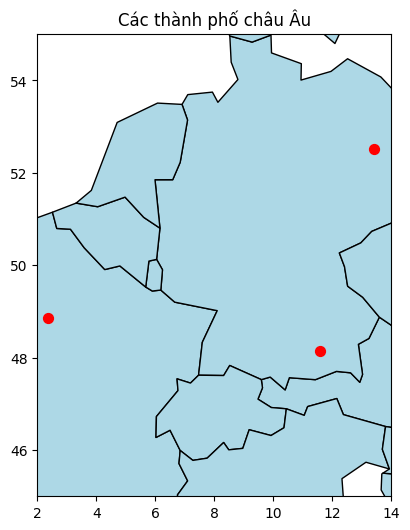

In [1]:
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt

# Tạo DataFrame từ các thông tin về thành phố
df = pd.DataFrame({
    'city': ['Berlin', 'Paris', 'Munich'],
    'latitude': [52.518611111111, 48.856666666667, 48.137222222222],
    'longitude': [13.408333333333, 2.3516666666667, 11.575555555556]
})

# Tạo GeoDataFrame từ DataFrame
gdf = gpd.GeoDataFrame(df.drop(['latitude', 'longitude'], axis=1),
                       crs='epsg:4326',
                       geometry=[shapely.geometry.Point(xy)
                                 for xy in zip(df.longitude, df.latitude)])

# Đọc dữ liệu bản đồ thế giới
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Vẽ bản đồ thế giới với màu nền lightblue và viền đen
fig, ax = plt.subplots(figsize=(10, 6))  # Kích thước bản đồ 10x6 inches
base = world.plot(ax=ax, color='lightblue', edgecolor='black')

# Vẽ điểm trên bản đồ thế giới với màu đỏ và kích thước 50
gdf.plot(ax=base, marker='o', color='red', markersize=50)

# Đặt tiêu đề cho biểu đồ
plt.title('Các thành phố châu Âu')

# Giới hạn phạm vi hiển thị của bản đồ
ax.set_xlim([2, 14])   # Giới hạn longitude từ 2 đến 14
ax.set_ylim([45, 55])  # Giới hạn latitude từ 45 đến 55

# Hiển thị biểu đồ
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22864\456611957.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


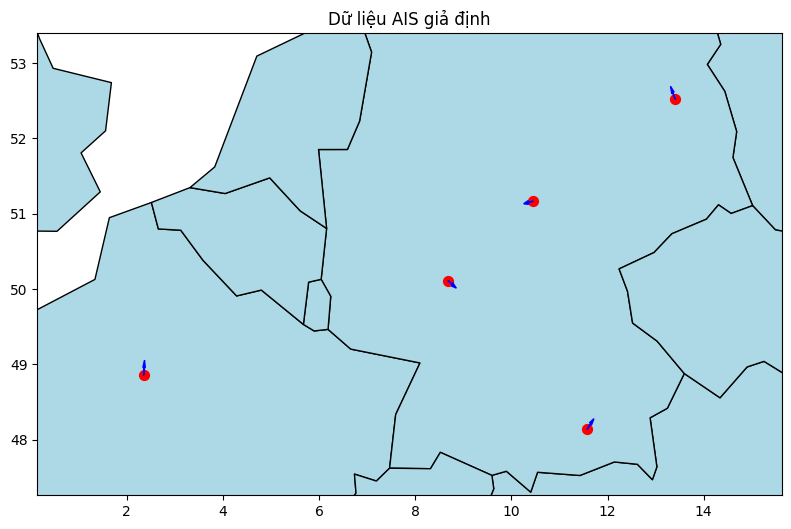

In [4]:
import pandas as pd
import geopandas as gpd
import shapely.geometry
import matplotlib.pyplot as plt
import numpy as np 

# Tạo DataFrame từ các thông tin về điểm AIS giả định
df = pd.DataFrame({
    'MMSI': [219961000, 256213000, 357254000, 265581970, 232156000],
    'Latitude': [52.518611, 48.856667, 48.137222, 50.110924, 51.165691],
    'Longitude': [13.408333, 2.352222, 11.575556, 8.682127, 10.451526],
    'COG': [120, 85, 45, 330, 190]  # Course Over Ground (Hướng)
})

# Tạo GeoDataFrame từ DataFrame
gdf = gpd.GeoDataFrame(df.drop(['Latitude', 'Longitude'], axis=1),
                       crs='epsg:4326',
                       geometry=[shapely.geometry.Point(xy) for xy in zip(df.Longitude, df.Latitude)])

# Đọc dữ liệu bản đồ thế giới
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Vẽ bản đồ thế giới với màu nền lightblue và viền đen
fig, ax = plt.subplots(figsize=(10, 6))  # Kích thước bản đồ 10x6 inches
base = world.plot(ax=ax, color='lightblue', edgecolor='black')

# Vẽ điểm trên bản đồ thế giới với màu đỏ và kích thước 50
gdf.plot(ax=base, marker='o', color='red', markersize=50)

# Vẽ mũi tên theo COG cho các điểm AIS
for x, y, cog in zip(df.Longitude, df.Latitude, df.COG):
    dx = 0.1 * np.cos(np.radians(cog))  # Tạo vector mũi tên theo hướng COG
    dy = 0.1 * np.sin(np.radians(cog))
    ax.arrow(x, y, dx, dy, head_width=0.05, head_length=0.1, fc='blue', ec='blue')

# Đặt tiêu đề cho biểu đồ
min_lat, max_lat = df['Latitude'].min(), df['Latitude'].max()
min_lon, max_lon = df['Longitude'].min(), df['Longitude'].max()
plt.xlim(min_lon-(max_lon-min_lon)/5, max_lon + (max_lon-min_lon)/5)
plt.ylim(min_lat -(max_lat-min_lat)/5, max_lat + (max_lat-min_lat)/5)
plt.title('Dữ liệu AIS giả định')

# Hiển thị biểu đồ
plt.show()
